# RED WINE QUALITY PREDICTION

# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings(action='ignore')


# Loading DataSet

In [2]:
#project url to downlaod the dataset 
wine = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#load the first 5 elements
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#shape of the dataset 
wine.shape

(1599, 12)

# Description of Data

In [5]:
#Description of data.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Column heads
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Finding Null Values

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Visualisation for better insight

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

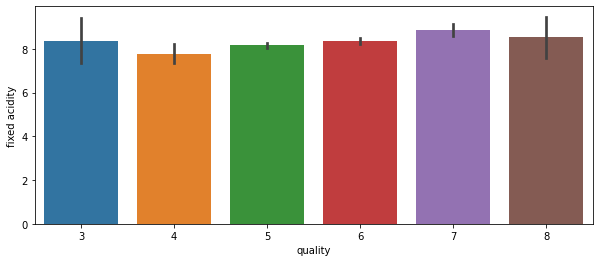

In [8]:
#Fixed acidity vs quality
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='fixed acidity',data=wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

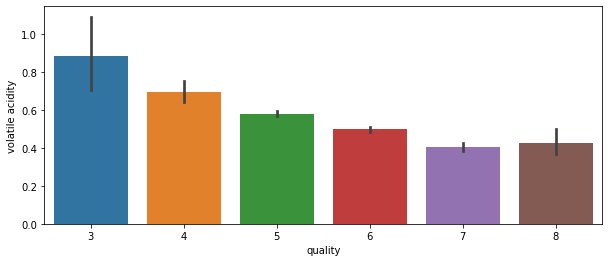

In [9]:
#volatile acidity vs quality
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='volatile acidity',data=wine)

Volatile acidity shows the decresing trend.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

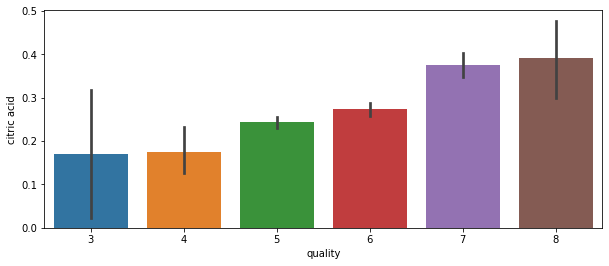

In [10]:
#citric acid vs quality
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='citric acid',data=wine)

Citric acid shows the increasing trend.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

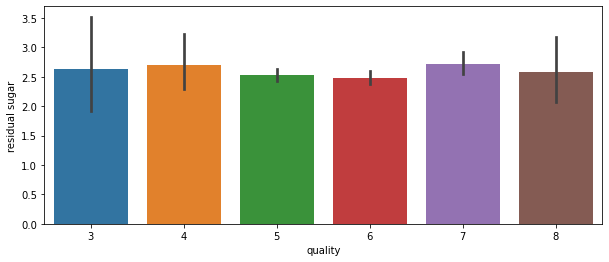

In [11]:
#residual sugar vs quality 
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='residual sugar',data=wine)

Residual sugar has the almost same trend but slightly decreasing at some points.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

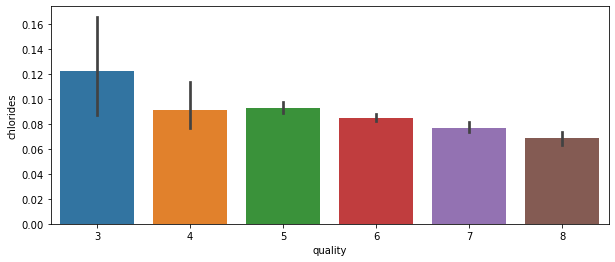

In [12]:
#cholorides vs quality 
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='chlorides',data=wine)

chlorides has the downward trend.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

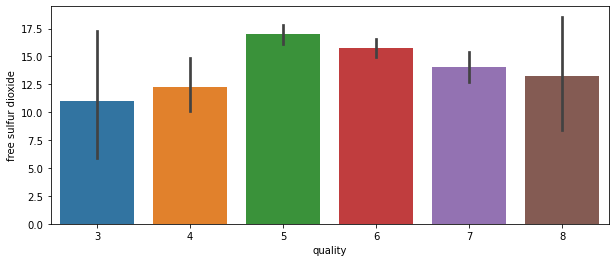

In [13]:
#free sulfer dioxide vs quality 
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

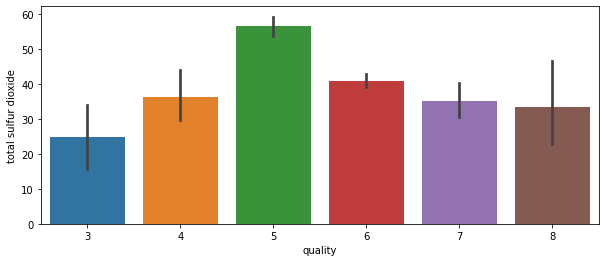

In [14]:
#Total sulfur dioxide vs quality
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

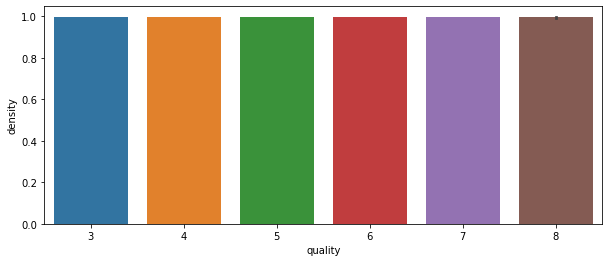

In [15]:
#density vs quality
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='density',data=wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

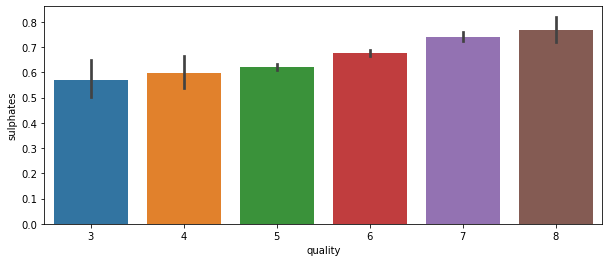

In [16]:
#sulphates vs quality 
plt.figure(figsize=(10,4))
sns.barplot(x='quality',y='sulphates',data=wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

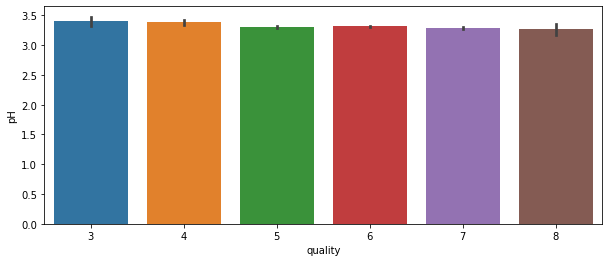

In [17]:
#pH vs quality 
plt.figure(figsize=(10,4))
sns.barplot(x="quality",y="pH",data=wine)

pH value is almost same.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

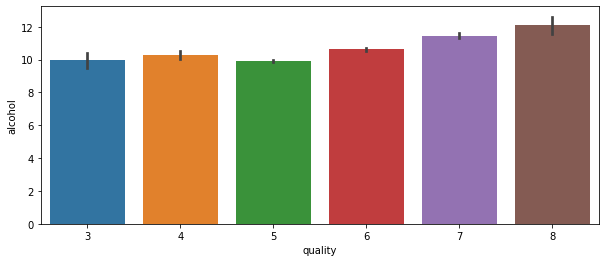

In [18]:
#alcohol vs quality 
plt.figure(figsize=(10,4))
sns.barplot(x="quality",y="alcohol",data=wine)

The bar is in increasing trend

# Checking the Correlation 

In [19]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [20]:
wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:>

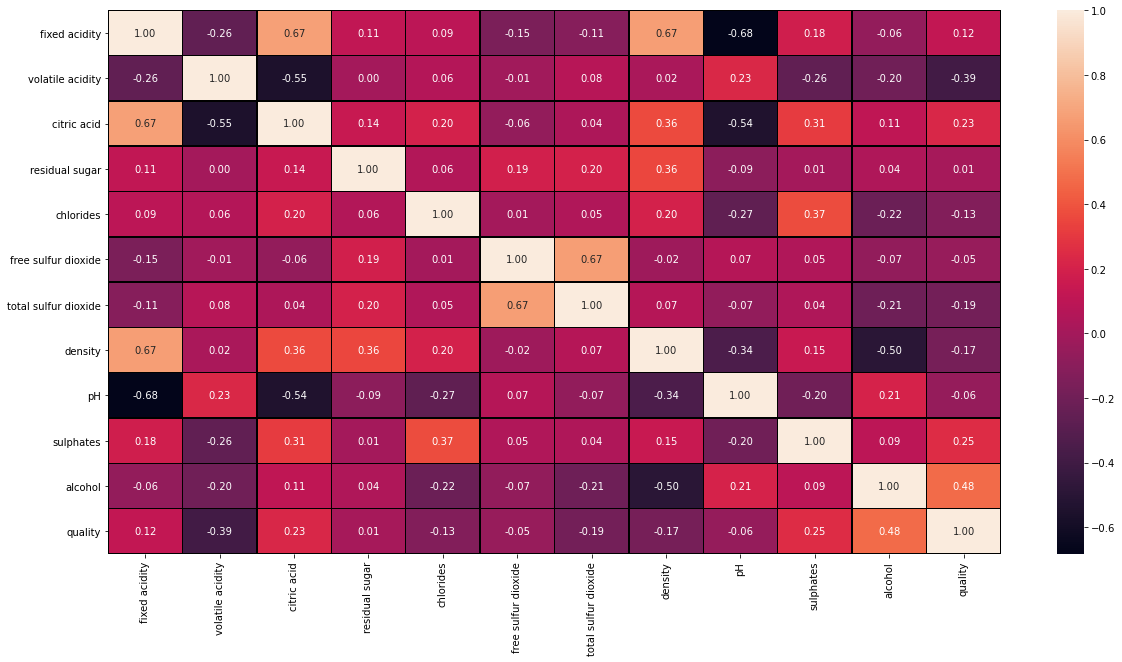

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(),annot=True,linecolor='black',linewidth=0.5,fmt='.2f')

# Pre-Processing for ML Algorithm

In [22]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [23]:
#wine quality classification based on its quality
#Bad=0 ranging(3-6)
#Good=1 ranging (7-8)
wine['quality']=wine['quality'].apply (lambda x:1 if x > 7 else 0)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [24]:
print (wine["quality"].value_counts())

0    1581
1      18
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='Count'>

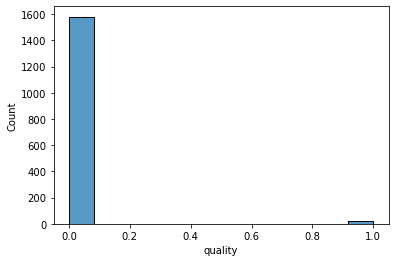

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(wine["quality"])

In [26]:
#Seperating data from dependent and independent variable

x=wine.iloc[:, :-1].values
y=wine.iloc[:, -1].values

In [27]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [28]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
#Splitting train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 101)


print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1279, 11)
(320, 11)
(1279,)
(320,)


In [30]:
#scaling data
scale_=StandardScaler()
x_train=scale_.fit_transform(x_train)
x_test=scale_.fit_transform(x_test)

#  Random Forest Classifier Algorithims

In [31]:
from sklearn.metrics import confusion_matrix

random_reg = RandomForestClassifier(n_estimators=100)
random_reg.fit(x_train,y_train)
y_pred = random_reg.predict(x_test)

[[317   0]
 [  3   0]]


<Figure size 720x432 with 0 Axes>

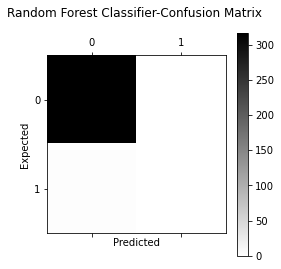

In [48]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

fg=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation="nearest")
plt.title("Random Forest Classifier-Confusion Matrix \n")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [33]:
print("Total Prediction :\n", len(y_pred))
print("Actual Prediction:\n", sum(y_pred==y_test))
print("Incorrect Prediction:\n", sum(y_pred!=y_test))
print("Accuracy :\n", sum(y_pred == y_test) *100 / len(y_pred),"%")

Total Prediction :
 320
Actual Prediction:
 317
Incorrect Prediction:
 3
Accuracy :
 99.0625 %


# Support Vector Classifier Algorithm

In [34]:
svc_reg = SVC()

svc_reg.fit(x_train,y_train)
 
y_pred=svc_reg.predict(x_test)

[[317   0]
 [  3   0]]


<Figure size 720x432 with 0 Axes>

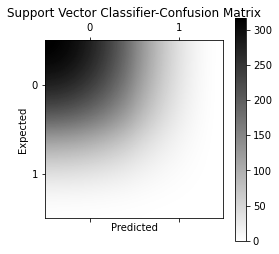

In [50]:
sv=confusion_matrix(y_test,y_pred)
print(sv)

fg=plt.figure(figsize=(10,6))
plt.matshow(sv,cmap=plt.cm.binary,interpolation="quadric")
plt.title("Support Vector Classifier-Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Expected')     
plt.show()

In [36]:
print("Total Prediction :\n", len(y_pred))
print("Actual Prediction:\n", sum(y_pred == y_test))
print("Incorrect Prediction:\n", sum(y_pred != y_test))
print("Accuracy :\n", (sum(y_pred == y_test) *100 / len(y_pred),"%"))

Total Prediction :
 320
Actual Prediction:
 317
Incorrect Prediction:
 3
Accuracy :
 (99.0625, '%')


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

[[317   0]
 [  3   0]]


<Figure size 720x432 with 0 Axes>

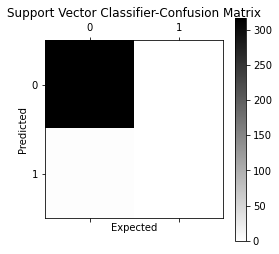

In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

fg=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation="nearest")
plt.title("Support Vector Classifier-Confusion Matrix")
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

In [39]:
print("Total Prediction :\n", len(y_pred))
print("Actual Prediction:\n", sum(y_pred==y_test))
print("Incorrect Prediction:\n", sum(y_pred!=y_test))
print("Accuracy :\n", (sum(y_pred == y_test) *100 / len(y_pred),"%"))

Total Prediction :
 320
Actual Prediction:
 317
Incorrect Prediction:
 3
Accuracy :
 (99.0625, '%')


# Tuning ML Algorithm

# SVC

In [40]:
parameter={
           'C':[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
      'kernel':['linear','rbf'],
       'gamma':[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

grid_svc=GridSearchCV(svc_reg,param_grid=parameter,scoring ="accuracy",cv=10)

In [41]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [42]:
print("Best Parameter for SVC:\n",grid_svc.best_params_)

Best Parameter for SVC:
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


Confusion Matrix  :
 [[317   0]
 [  3   0]]


<Figure size 720x432 with 0 Axes>

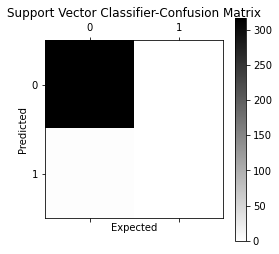

In [43]:
svc_reg2= SVC(C= 0.1, gamma= 0.1, kernel= 'linear')

svc_reg2.fit(x_train,y_train)
y_pred_svc=svc_reg.predict(x_test)

cm_svc2 = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix  :\n",cm_svc2)

fg=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation="nearest")
plt.title("Support Vector Classifier-Confusion Matrix")
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

In [44]:
print("Total Prediction :\n", len(y_pred_svc))
print("Actual Prediction:\n", sum(y_pred_svc==y_test))
print("Incorrect Prediction:\n", sum(y_pred_svc!=y_test))
print("Accuracy :\n", (sum(y_pred_svc == y_test) *100 / len(y_pred_svc),"%"))

Total Prediction :
 320
Actual Prediction:
 317
Incorrect Prediction:
 3
Accuracy :
 (99.0625, '%')


# RFC

In [45]:
rfc= cross_val_score(estimator=random_reg, X= x_train, y =y_train, cv=10)
rfc.mean()

0.9882750984251969

# Outcome

In [46]:
# The dataset has 1599 rows and 12 columns.
# Used 3 models for prediction.
# Used attaractive barplot to plot the data for better understanding.
# Result of Random Forest Classifier,Logistic Regression and Support Vector Calssifier's is same.
# After evaluating the outcome from the classifiers the accuracy of wine quality is 98% which can be marked as good.
